# Setup

In [1]:
!pip install nbresult

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
%cd /content/drive/MyDrive/Le Wagon 2024/Deep learning/data-multiclass-classification
%ls

/content/drive/MyDrive/Le Wagon 2024/Deep learning/data-multiclass-classification
Makefile  multiclass_classification.ipynb  README.md  tests/


# Imports

In [47]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential, layers

# Multiclass classification

* We just solved a binary classification problem in the previous challenge.
* What about a **multiclass classification task**?

🎯 Exercise Objectives:
- Write a Neural Network designed for a multiclass classification problem
- Observe how this model could easily overfit... !

## (1) Create a `Blobs` dataset

📚 The **`make_blobs`** function from Sklearn [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) allows you to generate:
- an arbitrary number of data sample, argument `n_samples`
- an arbitrary number of features per data sample, argument `n_features`
- an arbitrary number of categories, argument `centers`
- a distance between the categories, argument `cluster_std`

💡 There is also the `random_state` argument that allows us to create the data deterministically, in order to reproduce the same data.


❓ Based on the documentation:

👽 Generate a ***blobs*** dataset with:
- 1200 samples
- 8 features per sample
- 7 categories of data
- 8 as the distance between the categories

🔮 Select a `random_state` equal to 1.

📏 Print the shape and check that it corresponds to (1200, 8) for `X` and (1200,) for `y` ❓

In [8]:
blobs = make_blobs(n_samples=1200, n_features=8, centers=7, cluster_std=8)


(1200, 8)
(1200,)


❓ Use _matplotlib_ to draw a scatterplot of two (arbitrary) dimensions of this blobs dataset. Each dot should be colored with the category it belongs to. ❓

In [15]:
X = blobs[0]
y = blobs[1]

In [25]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([172, 172, 172, 171, 171, 171, 171]))

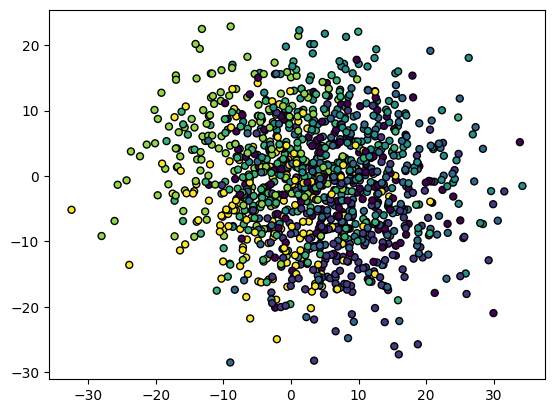

In [20]:
plt.scatter(X[:,1], X[:,2],  marker="o", c=y, s=25, edgecolor="k")

❓ Repeat the operation on other dimensions. You should see visually that the data points are not easily separable ❓

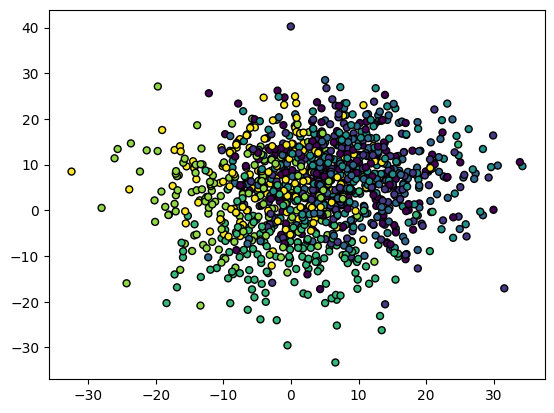

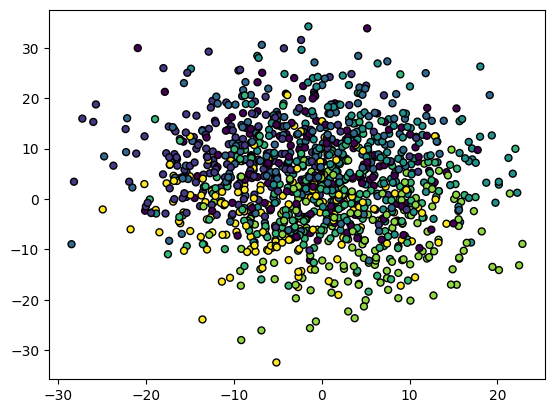

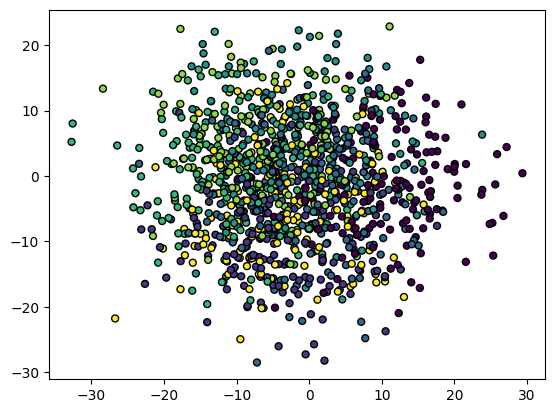

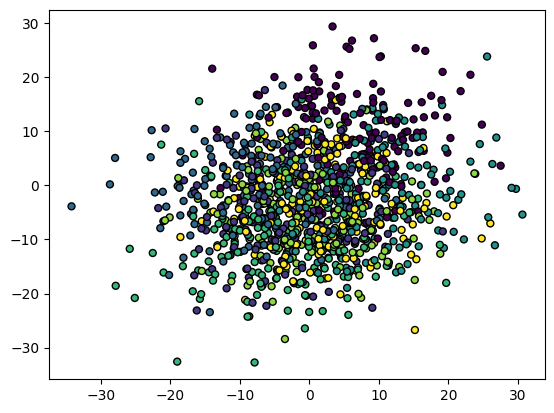

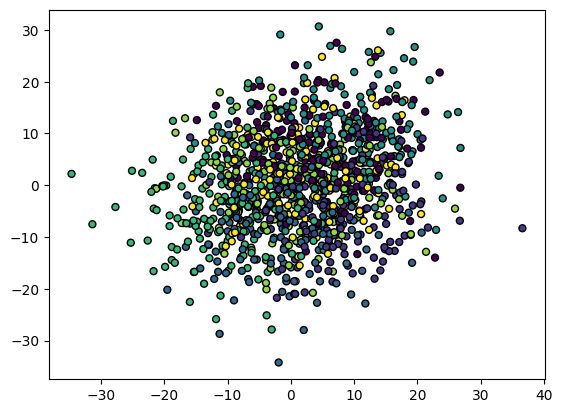

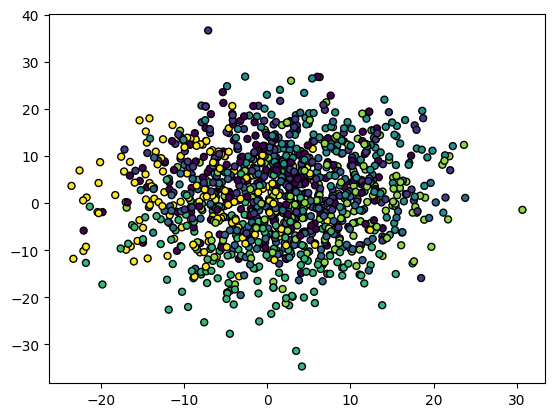

In [29]:
for i in range(1,7):
  plt.scatter(X[:,i], X[:,i-1],  marker="o", c=y, s=25, edgecolor="k")
  plt.show()

## (2) Encoding the target of a multi-class classification problem

👉 For the moment, the target `y` is a list of integers,  corresponding to the category of the input data. It looks like `[3, 2, 2, 3, 0, 5, 1, 1, 0, 5, ...]` (in this example, we have 7 categories, from 0 to 6).

🧑🏻‍🏫 However, **`for categorical problems in Tensorflow.Keras, the target/output should be encoded`** in the following way:

```
[
[0, 0, 0, 1, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 0],
[0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1],
...
]
```

where:
* the number of rows is equal to the number of observations
* the number of columns is equal to the number of different categories

👉 Each column corresponds to a category.

👉 Each row corresponds to a target, the 1 being the category the input data belongs to.

You can view a row as a vector of probabilities.

```
Example:
| Cat 0 | Cat 1 | Cat 2 | Cat 3 | Cat 4 | Cat 5 | Cat 6 |
|-------|-------|-------|-------|-------|-------|-------|
| 0     | 0     | 0     | 1     | 0     | 0     | 0     |

means that for this given row, there is a 100% chance that the row belongs to the Cat 3
```

---

💡 To transform `y` to categories, use **to_categorical** function from Tensorflow/Keras.


<detail>
    <summary><i> Is there an analogy between the _to_categorical_ of Tensorflow/Keras and the _OneHotEncoder_ of Scikit-Learn ?</i></summary>
    

Yes! *to_categorical* works a bit like the OneHotEncoder in Sklearn but instead of encoding a categorical feature, we are now encoding a categorical target.
    
</details>

---

❓ **Encoding the categorical target**:  Print `y`, then apply  *to_categorical* to *`y`* and store the *categorized version of y* into a variable called `y_cat`. ❓

In [35]:
print(y)
y_cat = tf.keras.utils.to_categorical(y)
print(y_cat)

[0 0 3 ... 5 4 0]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


## (3) Neural Network for a Multiclass Classification Task

❓ **Hold-out method**: Split the dataset $X$ and $y_{cat}$ into a _train_ and _test_ set (size: 70/30%)

Remark: Please call the variables `X_train`, `X_test`, `y_train`, and `y_test` ❓

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, train_size=0.7, random_state=0)

In Deep Learning, as in any Machine Learning algorithm, your numerical features should be scaled.

❓ **Scaling**: Fit a Sklearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) on the training set and transform both your train set and test set ❓

In [41]:
scaler = StandardScaler().fit(X_train)

In [43]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
X_test.shape

(360, 8)

In [44]:
X_test_scaled.shape

(360, 8)

❓ **Initializing a model**: Complete the following function to build/initialize a model that has:
- a first layer with:
    - 50 neurons
    - the `relu` activation
    - the correct input dimension
- a output layer:
    - designed for a multiclass classification task
    - which outputs probabilities of belonging to each class ❓

In [48]:
def initialize_model():

    #############################
    #  1 - Model architecture   #
    #############################

    model = Sequential()
    model.add(layers.Dense(50, activation="relu", input_dim=8))
    model.add(layers.Dense(7, activation="softmax"))

    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='categorical_crossentropy', # different from binary_crossentropy because we have multiple classes
                  optimizer='adam',
                  metrics=['accuracy'])

    return model


model = initialize_model()

❓  How many parameters (a.k.a. weights) are there in the model ❓

In [49]:
50 * 8 + 50 + 50 * 7 +7

807

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 7)                 357       
                                                                 
Total params: 807 (3.15 KB)
Trainable params: 807 (3.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


❓ **Fitting the model**: Fit your model on the train data with 50 epochs and plot the history ❓

In [79]:
model = initialize_model()
history = model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
27/27 [==============================] - 2s 6ms/step - loss: 2.0649 - accuracy: 0.1571
Epoch 2/50
27/27 [==============================] - 0s 7ms/step - loss: 1.8218 - accuracy: 0.2452
Epoch 3/50
27/27 [==============================] - 0s 5ms/step - loss: 1.6355 - accuracy: 0.4286
Epoch 4/50
27/27 [==============================] - 0s 5ms/step - loss: 1.4819 - accuracy: 0.5560
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 1.3567 - accuracy: 0.5952
Epoch 6/50
27/27 [==============================] - 0s 7ms/step - loss: 1.2530 - accuracy: 0.6310
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 1.1697 - accuracy: 0.6560
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 1.1007 - accuracy: 0.6619
Epoch 9/50
27/27 [==============================] - 0s 4ms/step - loss: 1.0476 - accuracy: 0.6667
Epoch 10/50
27/27 [==============================] - 0s 4ms/step - loss: 1.0068 - accuracy: 0.6750
Epoch 11/50
27/27 [

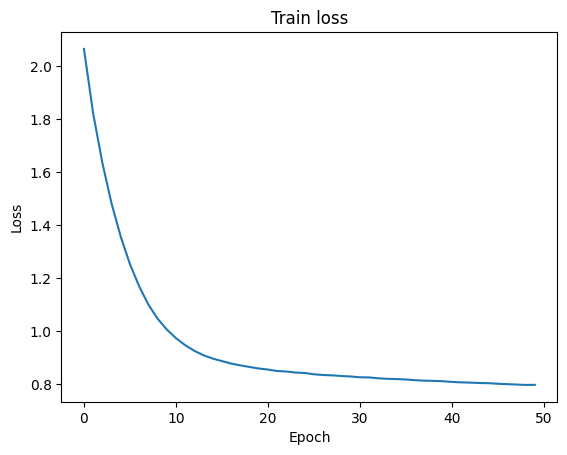

In [80]:
plot_history(history)

❓ **Evaluation**:  Evaluate your model on the test set and print the accuracy ❓

In [81]:
model.evaluate(X_test_scaled, y_test)

12/12 [==============================] - 0s 3ms/step - loss: 0.9282 - accuracy: 0.6667


[0.9282114505767822, 0.6666666865348816]

❓ 🤔 Is this a good score? You should compare it to some sort of benchmark value. In this case, what score would a random guess give? Store this baseline score in the `accuracy_baseline` variable. ❓

In [68]:
accuracy_baseline = 1/7
accuracy_baseline

0.14285714285714285

🧪 **Test your code**

In [65]:
from nbresult import ChallengeResult
result = ChallengeResult('baseline',
                         accuracy=accuracy_baseline)
result.write()
print(result.check())


======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.4.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/Le Wagon 2024/Deep learning/data-multiclass-classification/tests
plugins: anyio-3.7.1
collecting ... collected 1 item

test_baseline.py::TestBaseline::test_accuracy PASSED                                         [100%]

======================================== 1 passed in 0.07s =========================================


💯 You can commit your code:

git add tests/baseline.pickle

git commit -m 'Completed baseline step'

git push origin master



❗ 👀 Wait ... If you get a closer look at the plot of the loss, it seems that the loss was still decreasing after 50 epochs. Why stop it so soon ❓❗

❓ Let's re-initialize and re-run the model with 1000 epochs this time, and again plot the history. ❓

In [82]:
model = initialize_model()
history = model.fit(X_train, y_train, epochs=1000, verbose=False)

In [75]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

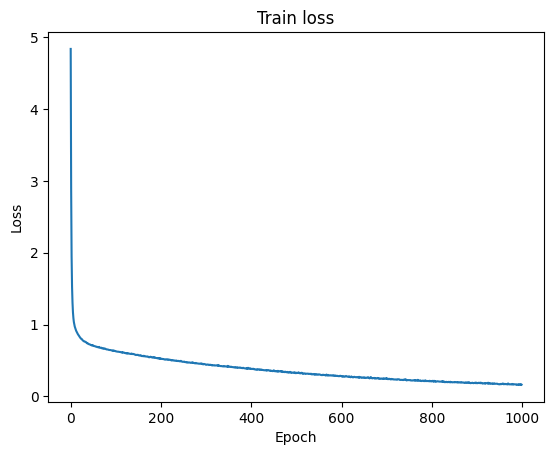

In [83]:
plot_history(history)

❓ **When training a model for a longer time...** ❓
- What can you say about the new loss?
- Once again, evaluate your model on the test set and print the accuracy

In [84]:
model.evaluate(X_test_scaled, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 2.4240 - accuracy: 0.1528


[2.4240405559539795, 0.1527777761220932]

* 😁 The loss computed on the train set seems smaller with 1000 epochs than with 50 epochs.
* 😟 But the accuracy on the test set is worse with 1000 epochs than with 50 epochs...

❓ What is this phenomenon called ❓

> Overfitting.

---

🤔 What should we do to prevent this from happening?

<details>
    <summary><i>Possible options</i></summary>
    

⚠️ To prevent overfitting from happening in Neural Networks, we can - for example:
1. Choose a ***reasonable number of epochs*** to prevent the neural network from learning too much from noisy data points
2. Create what is called an ***Early Stopping*** criterion, i.e. a way to stop the training earlier than the numbers of epochs set in the _.fit()_ 📆 cf. ***Deep Learning > Optimizers, Loss, Fitting***

</details>    

---


❓ Let's visually check when the test loss starts increasing again in practice.  Run the following command and plot the history❓

In [85]:
model = initialize_model()

history = model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs = 500,
                    batch_size = 16,
                    verbose = 0)

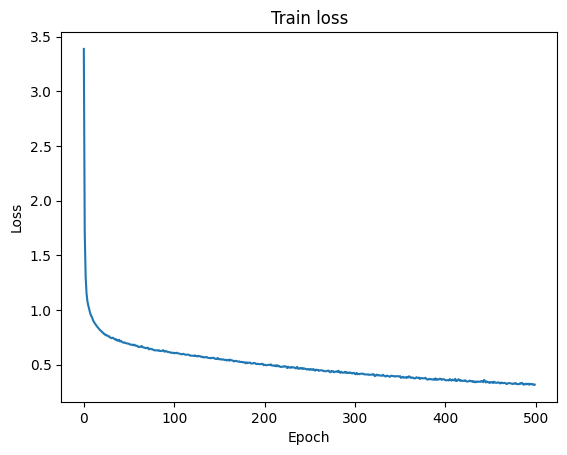

In [86]:
plot_history(history)

😱 But wait... aren't we cheating if we use the test set? Yes we are. But again, be patient. In ***Deep Learning - Optimizers, Loss, Fitting***, we will use what we call a ***Validation Set*** to avoid this!

🧘🏻‍♀️ So for now, let's move on to the next questions!

❓ **Evaluating the network**: Plot the values of the loss and accuracy on the <span style="color:blue">train set</span> and on the <span style="color:orange">test set</span>. What can you comment on that ❓

In [87]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

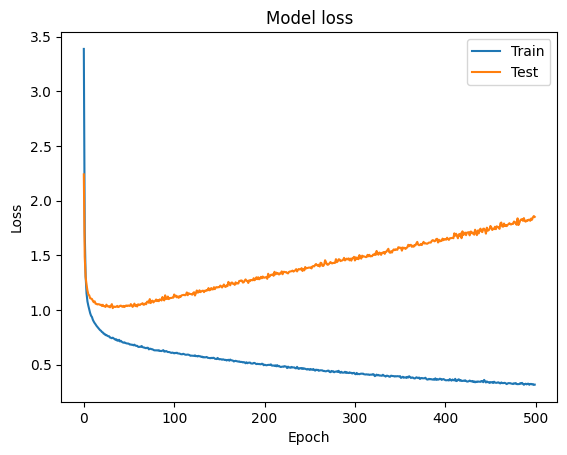

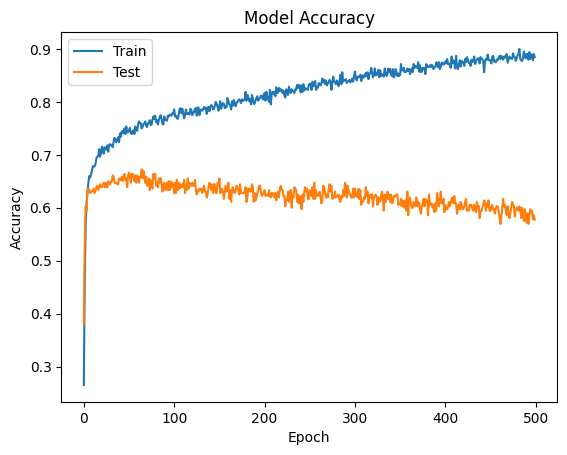

In [88]:
plot_loss_accuracy(history)

🤔 Why is our Deep Learning model overfitting so easily?

😳 Think about it, our neural network has to learn ~800 parameters for a simple classification task from a dataset of only 8 features! Besides, we only have ~800 data points in total to fit! The model could almost "learn" the exact class of every point in its train set.

By contrast, a simple Logistic Regression would have required to learn only 9 parameters to capture the patterns of this blobs dataset!

😏 Deep Learning is fancy, but can clearly be an overkill and unnecessary option for easy Machine Learning tasks!

⭐️ It will be extremely useful for:
- 📸 Image Processing
- 💹 Time Series
- 🗣 Natural Language Processing

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!